### Lab-9

In [55]:
import cv2
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt
import scipy

In [66]:
import scipy.io
from scipy.io import loadmat
image=loadmat('imageFile.mat')['g'] #Loading the image

In [53]:
def markov_1_process():
    p=0.91
    R=np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            R[i][j]=p**(abs(i-j))
    return R

In [4]:
def DCT_matrix_1D(image):
    N=np.shape(image)[0] # Considering its a square image
    C=np.zeros((N,N))
    for k in range(N):
        for n in range(N):
            if k==0:
                C[k,n]=np.sqrt(1/N)
            else:
                C[k,n]=(np.sqrt(2/N))*(np.cos(np.pi*(2*n+1)*k/(2*N)))
    return C

In [5]:
def DCT_Matrix_2D(C,image):
    c=np.kron(C,C)
    u=image.ravel()
    v=np.matmul(c,u)
    v=np.reshape(v,(8,8))
    return v

In [6]:
def WALSH_HADDAMARD(mat):
    N=np.shape(mat)[0] # Considering its a square matrix
    H1=np.array(([1, 1], [1, -1]))/np.sqrt(2)
    H=H1.copy()
    if N==1:
        H=H1
    else:
        for i in range(1,6):     # Since the R matrix will unroll to 64*1 so Haddamard matrix should be 64*64
              H=np.kron(H,H1)    # which is 2^6.
                
        return H

In [7]:
def WALSH_HADDAMARD_2D(H,matrix):
    C=matrix.ravel()
    v=np.matmul(H,C)
    v=np.reshape(v,(8,8))
    return v

In [8]:
#Computing Energy packing efficiency and De-correlation Efficiency 

def func(R_p,R):
    
    #Energy packing efficiency
    
    diagonal_val=np.abs(np.diag(R_p))
    deno=np.sum(diagonal_val)
    num=np.cumsum(diagonal_val)
    EPE=num/deno
    
    #De-correlation Efficiency
    
    R_p=R_p - np.diag(np.diag(R_p))
    R=R - np.diag(np.diag(R))
    alpha=np.sum(np.abs(R_p))
    beta=np.sum(np.abs(R))
    eta=1-alpha/beta
    
    return EPE, eta
    

In [9]:
#Finding the R matrix for 1st order Markov process

R=markov_1_process()

#For DCT on Markov Process:

transform_DCT=DCT_Matrix_2D(DCT_matrix_1D(R),R)

epe_DCT,eta_DCT=func(transform_DCT,R)

#For Walsh Haddamard Transform:

transform_WHT= WALSH_HADDAMARD_2D(WALSH_HADDAMARD(R),R)

epe_WHT,eta_WHT=func(transform_WHT,R)

Text(0.5, 1.0, 'EPE Vs Coefficients')

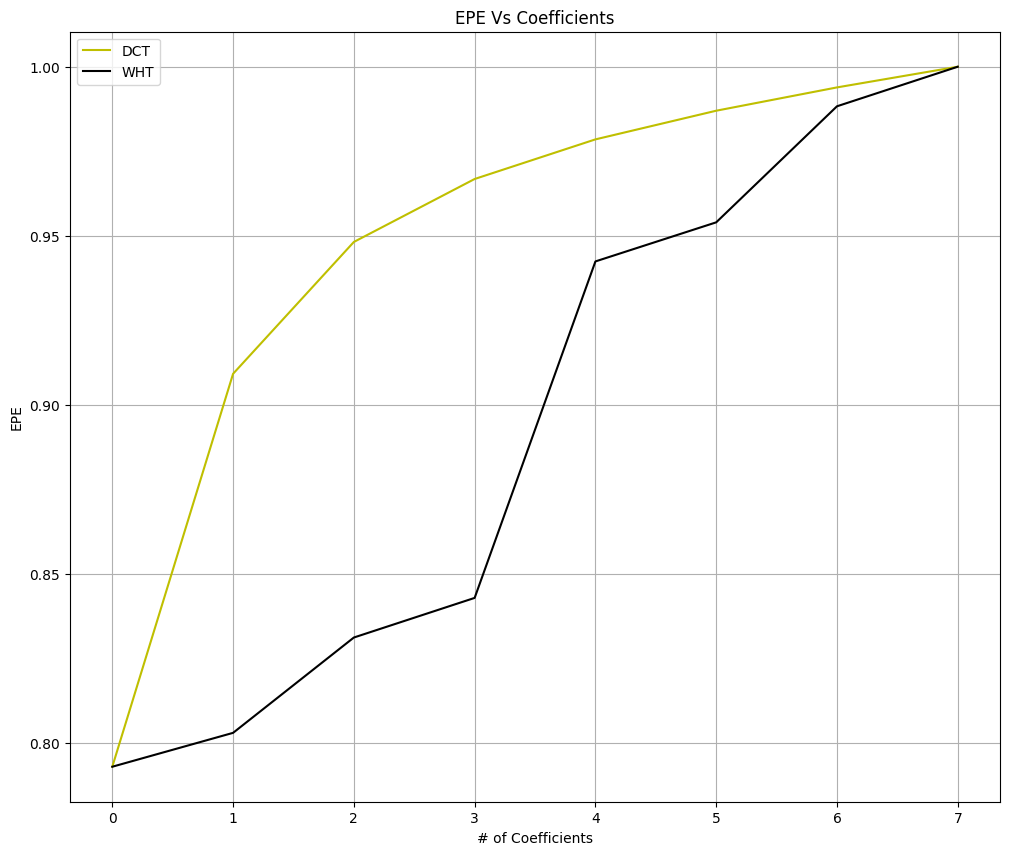

In [10]:

fig = plt.figure(figsize=(12,10))
plt.plot(range(8),epe_DCT,'y')
plt.plot(range(8),epe_WHT,'k')
plt.grid()
plt.xlabel("# of Coefficients")
plt.ylabel("EPE")
plt.legend(["DCT", "WHT"])
plt.title("EPE Vs Coefficients")

In [11]:
print("Decorrelation efficiency of DCT= ",eta_DCT)
print("Decorrelation efficiency of WHT= ",eta_WHT)

Decorrelation efficiency of DCT=  0.9804711989227338
Decorrelation efficiency of WHT=  0.9485667904674057


In [12]:
transform_DCT # We can see that diagonal elements are larger(Of orders of magnitude 15 or 17)comapred to others
              #in the corresponding rows thus, DCT has almost diagonalised the R matrix. Had p=1 then it would have
              # fully diagonalised 

array([[ 6.34351235e+00,  6.66133815e-16, -2.90971471e-01,
         9.99200722e-16, -6.59250314e-02, -4.44089210e-16,
        -2.09383335e-02,  7.54951657e-15],
       [ 5.55111512e-16,  9.29862825e-01,  8.32667268e-17,
        -2.66292724e-02,  8.32667268e-17, -7.97556072e-03,
         7.77156117e-16, -2.01462871e-03],
       [-2.90971471e-01,  1.73472348e-17,  3.11957346e-01,
         2.08166817e-17, -1.28924507e-03,  9.71445147e-17,
        -4.09474864e-04, -1.66533454e-16],
       [ 5.65519853e-16, -2.66292724e-02,  3.81639165e-17,
         1.48981250e-01,  6.93889390e-17, -8.76162706e-04,
         6.93889390e-17, -2.21318927e-04],
       [-6.59250314e-02,  2.25514052e-17, -1.28924507e-03,
         9.71445147e-17,  9.37399525e-02,  0.00000000e+00,
        -9.27741927e-05,  2.77555756e-17],
       [-5.49907342e-16, -7.97556072e-03,  4.51028104e-17,
        -8.76162706e-04,  6.59194921e-17,  6.78280163e-02,
         1.90819582e-17, -6.62857968e-05],
       [-2.09383335e-02,  7.216449

In [13]:
####Q2

In [14]:
p=0.91
beta=(1-p**2)/(1+p**2)
R_inverse=np.linalg.inv(R)
beta_R_inverse=beta*R_inverse

In [15]:
def display_mat(Mat, n_dec=3):
    print(np.round(Mat, decimals=n_dec))

In [16]:
display_mat(beta_R_inverse,n_dec=2) 

[[ 0.55 -0.5  -0.    0.   -0.   -0.    0.   -0.  ]
 [-0.5   1.   -0.5   0.   -0.    0.   -0.    0.  ]
 [-0.   -0.5   1.   -0.5   0.   -0.    0.   -0.  ]
 [-0.   -0.   -0.5   1.   -0.5   0.   -0.    0.  ]
 [-0.   -0.    0.   -0.5   1.   -0.5   0.   -0.  ]
 [-0.    0.   -0.    0.   -0.5   1.   -0.5   0.  ]
 [ 0.   -0.    0.    0.   -0.   -0.5   1.   -0.5 ]
 [-0.    0.    0.   -0.    0.   -0.   -0.5   0.55]]


In [17]:
# The Q matrix

alpha=p/(1+p**2)
Q=np.zeros((8,8))
np.fill_diagonal(Q,1)
for i in range(8):
    for j in range(8):
        if abs(i-j)==1:
            Q[i,j]=-alpha

In [18]:
display_mat(Q,n_dec=2)

[[ 1.  -0.5  0.   0.   0.   0.   0.   0. ]
 [-0.5  1.  -0.5  0.   0.   0.   0.   0. ]
 [ 0.  -0.5  1.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.  -0.5  1.  -0.5  0.   0.   0. ]
 [ 0.   0.   0.  -0.5  1.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.  -0.5  1.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.  -0.5  1.  -0.5]
 [ 0.   0.   0.   0.   0.   0.  -0.5  1. ]]


In [19]:

#Diagonalizing Beta-R-inverse matrix using DCT

ans1=DCT_Matrix_2D(DCT_matrix_1D(beta_R_inverse),beta_R_inverse)
display_mat(ans1,n_dec=2)

[[ 0.02  0.    0.01  0.    0.01  0.    0.01  0.  ]
 [ 0.    0.1  -0.    0.02  0.    0.01  0.    0.  ]
 [ 0.01 -0.    0.32 -0.    0.01  0.    0.01  0.  ]
 [-0.    0.02  0.    0.63  0.    0.01  0.    0.  ]
 [ 0.01 -0.    0.01  0.    1.01  0.    0.01  0.  ]
 [-0.    0.01  0.    0.01  0.    1.39  0.    0.  ]
 [ 0.01  0.    0.01  0.    0.01 -0.    1.71  0.  ]
 [ 0.    0.    0.    0.   -0.    0.   -0.    1.92]]


In [20]:
#Diagonalizing Q with DCT


ans2=DCT_Matrix_2D(DCT_matrix_1D(Q),Q)
display_mat(ans2,n_dec=2)

[[ 0.13 -0.    0.16  0.    0.12  0.    0.07  0.  ]
 [-0.    0.32  0.    0.2   0.    0.14  0.    0.05]
 [ 0.16 -0.    0.51  0.    0.16  0.    0.09  0.  ]
 [ 0.    0.2   0.    0.79  0.    0.11  0.    0.04]
 [ 0.12  0.    0.16  0.    1.12  0.    0.07  0.  ]
 [ 0.    0.14  0.    0.11  0.    1.46  0.    0.03]
 [ 0.07  0.    0.09  0.    0.07  0.    1.74  0.  ]
 [ 0.    0.05  0.    0.04  0.    0.03  0.    1.93]]


In [21]:
##Question 3

In [42]:
image

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 100, 100, 100, 255, 255],
       [255, 255, 100, 150, 150, 150, 100, 255],
       [255, 255, 100, 150, 200, 150, 100, 255],
       [255, 255, 100, 150, 150, 150, 100, 255],
       [255, 255, 255, 100, 100, 100, 255, 255],
       [255, 255, 255, 255,  50, 255, 255, 255],
       [ 50,  50,  50,  50, 255, 255, 255, 255]], dtype=uint8)

In [22]:
def eigenvalues_eigenvector(mat):
    eigen_values,eigen_vector=np.linalg.eig(mat)
    
    sorted_eigen_values=np.sort_complex(eigen_values)[::-1]
    j=np.argsort(eigen_values)[::-1]
    
    sorted_eigen_vector=np.zeros((8,8),dtype='complex')
    for i in range(sorted_eigen_values.shape[0]):
        sorted_eigen_vector[:,i]=eigen_vector[:,j[i]]
        
    return sorted_eigen_values,sorted_eigen_vector
        

In [108]:
def SVD(image):
    
    image = image.astype(np.float64)
    mat1=np.matmul(image,np.transpose(image))
    mat2=np.matmul(np.transpose(image),image)
    m,n=np.shape(image)
    limiting_dim = min(m, n)
    s=np.zeros((m,n))
    
    s1,U=eigenvalues_eigenvector(mat1) #mat1 and mat2 have same eigen values.
    s2,V=eigenvalues_eigenvector(mat2)
    print(s1,s2)
    for i in range(limiting_dim):
            
            s[i,i]=(np.sqrt(s1[i].real)+np.sqrt(s2[i].real))/2
            print((s1[i].real),(s2[i].real),s[i,i])
            
            
    return U.real,s,V.real

In [109]:
def reconstruction(U,S,V):
    output=U@S@(np.transpose(V))
    return output

In [110]:
U,S,V=SVD(image)
reconstructed_img=reconstruction(U,S,V)

[ 2.59341656e+06+0.j  1.11621523e+05+0.j  7.17383223e+04+0.j
  3.47908580e+04+0.j  1.18827410e+04+0.j  6.41787205e-11+0.j
  1.11824044e-12+0.j -2.74062356e-12+0.j] [ 2.59341656e+06+0.j  1.11621523e+05+0.j  7.17383223e+04+0.j
  3.47908580e+04+0.j  1.18827410e+04+0.j  3.72249419e-11+0.j
  5.46968154e-12+0.j -1.13314610e-10+0.j]
2593416.5554988645 2593416.5554988612 1610.408816263393
111621.52323579346 111621.52323579344 334.0980742772898
71738.32225949707 71738.32225949709 267.84010577114304
34790.85800319979 34790.85800319969 186.52307632890827
11882.741002648649 11882.741002648398 109.00798595813302
6.417872049774287e-11 3.7224941892667834e-11 7.056193433126409e-06
1.1182404441583307e-12 5.469681542129404e-12 1.6981019580034966e-06
-2.7406235558345133e-12 -1.133146096267197e-10 nan


C:\Users\koushik\AppData\Local\Temp\ipykernel_6264\2760466920.py:15: RuntimeWarning: invalid value encountered in sqrt
  s[i,i]=(np.sqrt(s1[i].real)+np.sqrt(s2[i].real))/2


In [89]:
def reconstruction_error_FBnorm(image, U,S,V):
    image = image.astype(np.float64)
    m,n=np.shape(image)
    limiting_dim = min(m, n)
    errors = np.zeros(limiting_dim)
    image_hat=np.copy(image)
    
    for j in range(limiting_dim):
        image_hat-=S[j,j]*np.outer(U[:,j],V[:,j]) #Removing the contribution of jth eigen value and subtracting it
                                                  #from the image
        errors[j] = np.sum((image_hat - image)**2)#Error calculation: Frobenius norm
    return errors

In [27]:
def theoretical_reconstruction_errors(Sigma):
    
    sigma = Sigma[abs(Sigma) > 0]
    return np.cumsum(sigma**2)

In [28]:
err=reconstruction_error_FBnorm(image, U,S,V)
a=theoretical_reconstruction_errors(S)

In [29]:
err

array([2593416.55549886, 2705038.07873466, 2776776.40099415,
       2811567.25899735, 2823450.        , 2823450.        ,
       2823450.        ,              nan])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


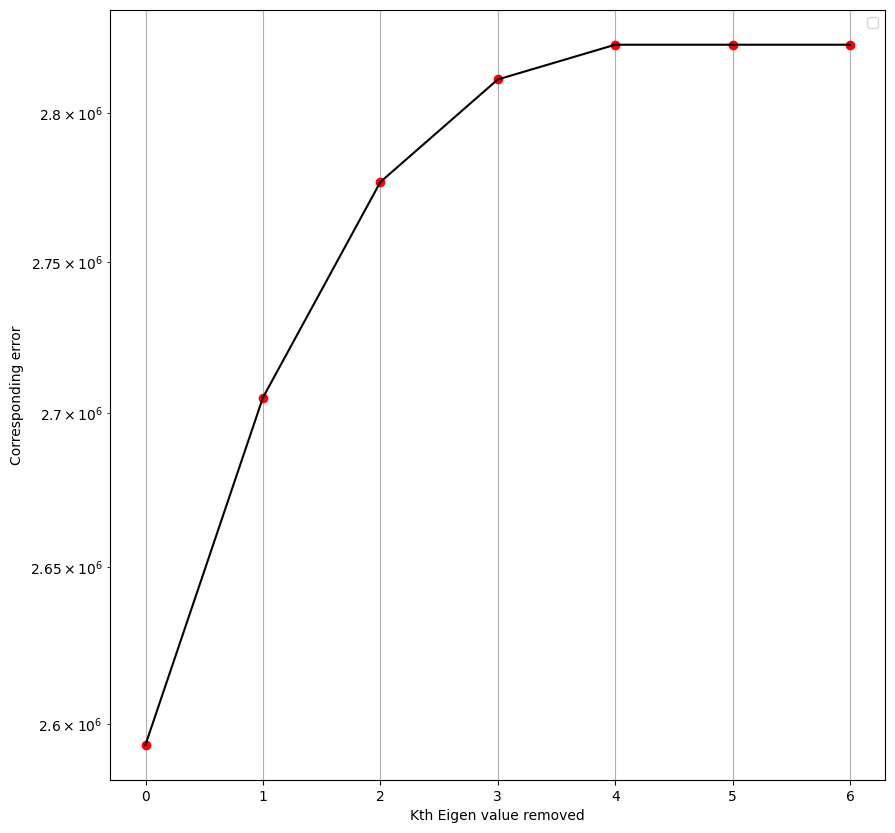

In [33]:
plt.figure(figsize=(10, 10)) 
plt.grid(True)
plt.xlabel("Kth Eigen value removed")
plt.ylabel("Corresponding error")
plt.semilogy(range(8),err,'ro')
plt.semilogy(range(7),a,'k')
plt.legend()